# 技术指标

In [1]:
# 从yahoo finance获取数据
import yfinance as yf

ticker = yf.Ticker("000001.SZ")

# hist = ticker.history(start="2024-11-01", end="2024-11-14")
hist = ticker.history(period="1mo")

df = hist[['Open', 'Close', 'High', 'Low', 'Volume']]

df[0:7]

,Open,Close,High,Low,Volume
Date,,,,,
2024-10-14 00:00:00+08:00,11.98,12.02,12.18,11.79,240059509
2024-10-15 00:00:00+08:00,11.94,11.90,12.23,11.88,207284077
2024-10-16 00:00:00+08:00,11.80,12.06,12.18,11.77,191449353
2024-10-17 00:00:00+08:00,12.07,11.95,12.23,11.93,165370809
2024-10-18 00:00:00+08:00,11.91,12.04,12.18,11.68,260465416
2024-10-21 00:00:00+08:00,11.94,11.81,11.94,11.63,280665467
2024-10-22 00:00:00+08:00,11.76,11.79,11.93,11.72,161778713


### 移动平均（moving average，MA）
***在统计学中是一种通过创建整个数据集中不同子集的一系列平均数来分析数据点的计算方法***

给定一个数列和一个固定子集大小，移动平均数的第一个元素是由数列的初始固定子集的平均值得到的。然后通过“向前移位”修改子集，即排除序列的第一个数，并在子集中包含下一个值。

移动平均通常与时间序列数据一起使用，以消除短期波动，突出长期趋势或周期。短期和长期之间的阈值取决于应用，移动平均的参数将相应地设置。数学上，移动平均是卷积的一种类型，因此它可以被看作是用于信号处理的低通滤波器的一个例子。当与非时间序列数据一起使用时，移动平均滤波器的频率分量更高，但与时间没有任何特定的联系，尽管通常暗含某种排序。简单地看，它可以看作是把数据变得更平滑。

移动平均线的变化包括：简单移动平均、指数移动平均、加权移动平均，以及累积移动平均。

### 简单移动平均（simple moving average，SMA）
---
在金融应用中，一个简单移动平均（SMA）是以前 n 个数据的未加权平均数。

例如，对于 n 天的收盘价样本，简单等权重移动平均是前 n 天收盘价的平均值。如果收盘价为$p_M$，$p_{M-1}$，... ，$p_{M-(n-1)}$，则公式为：

$$ \overline{p}_{SM} = \frac{p_M+p_{M-1}+...+p_{M-(n-1)}}{n} = \frac{1}{n}\sum_{i=0}^{n-1}p_{M-i} $$

当计算下一天的移动平均的时候，就会在求和中加入一个新值，剔除一个旧值，无需把所有数值重新加一遍：

$$ \overline{p}_{SM} = \overline{p}_{SM,prev} + \frac{1}{n}(p_M - p_{M-n}) $$

所选择的时间段取决于利率变动的类型，如短期、中期或长期。从金融角度来看，移动平均线水平可以解释为市场下跌时的支撑，或者市场上涨时的阻力。

<Axes: xlabel='Date'>

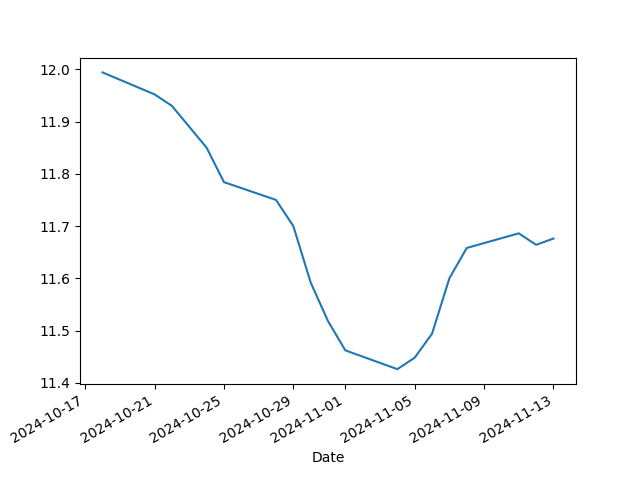

In [2]:
%matplotlib widget
# 计算简单移动平均线（SMA）
# data pandas.frame 股价表
# window number n天窗口期
def calculate_sma(data, window):
    sma = data['Close'].rolling(window=window).mean()
    return sma

calculate_sma(df, 5).plot(x_compat=True)

## 乖离率（Bias Ratio，BIAS）
***代表当日股票收盘价或盘中市价与移动平均线（MA）的差距，以分析股价偏离某时期平均价（平均成本）的程度。***

乖离率可视作某时期的平均报酬率。乖离率是由葛兰碧移动均线八大法则（J.Granville Rules）所延伸的技术指标，其判断依据为股价偏离移动平均线很远时，会转而趋向移动平均线；但葛兰碧法则并未论述偏移程度应达到多少，股价才会向移动平均线靠近。

乖离率可分为正乖离率与负乖离率，若股价在移动平均线之上，称为正乖离率；股价在移动平均线之下，则为负乖离率。

当股价与移动平均线的差距越远时，乖离率的绝对值越大（乖离率可正可负），代表乖离越大，股价即将有修正偏离的可能；当乖离率呈现正值过大或负值过大的情况时，股价均会产生反转的修正走势。

**正乖离**越正表示**超买**（Overbought），将有下跌的压力；**负乖离**越负表示**超卖**（Oversold），将有上升的动能，此时股价将有向平均成本移动调整的机会。

<br>

### 乖离率
---
$$ nBIAS = \frac{Close-MA_n}{MA_n} \times 100\% $$

【注】
1. $nBIAS$为n日乖离线；
2. $Close$为当日收盘价；
3. MA为移动平均价、$MA_n$为n日移动平均线，n依需求自定日数，一般设定为3日和6日。

<br>

### 均线乖离率
---
均线乖离率的概念是根据长短天期移动平均线的差值来决定多空的方向。如果股价在长天期均线之上则作多；反之股价在长天期均线之下则作空或空手。

$$ BIAS_{(MA)} = \frac{MA_{short} - MA_{long}}{MA_{long}} \times 100\% $$

【注】
1. $BIAS_{(MA)}$：均线乖离率；
2. $MA_{short}$为短天期均线、$MA_{long}$为长天期均线。

<br>

### n-mBIAS
---
$$ n-mBIAS = nBIAS - mBIAS $$

短天期的乖离率减去长天期的乖离率来分析趋势，一般会采用的天数为3天和6天。

当3BIAS与6BIAS交叉时，3-6BIAS会趋近于0，此点即为**支撑点**或**压力点**，此时可以视为买卖信号。不过3-6AIBS会有信号过多的问题，实际操作上可以拉长平均天数来使用（例如：10天和25天）。

### 布林带

### 成交量

### rsi